# Introduction To Python - Visualisation of Data


### Session 2 (Pandas)

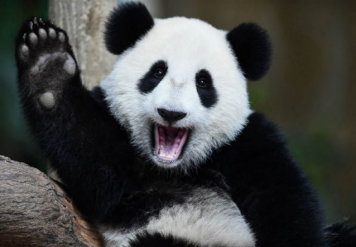

In this lecture, we will introduce you to the data analysis library for Python ``pandas``. 


**OUTLINE:**

1. DataFrames - dictionaries on steroids
2. Viewing data
3. Selection - Selecting particular elements of a Data Frame
4. More operations on DataFrame's rows/columns/entries
5. Grouping
6. Visualisation of DataFrames
7. Importing and Exporting files/spreadsheets.
8. Summary Exercises



### First we import pandas

In [5]:
import pandas as pd # we will be using pandas via the abbreviation pd
import numpy as np

# IMPORTANT Please read below:

Before starting please download from Moolde  the following files
- titanic.xlsx
- avocado.xlsx
- C19_portsmouth.xlsx

Then upload them to this notebook. 

# Spreadsheets in Pandas - No more Excel!

In excel or google sheets you deal with spreadsheets. Here is an example of a Titanic spreadsheet containing the basic information about the passengers including if they survived the incident (0 if did not survived, 1 if survived). 

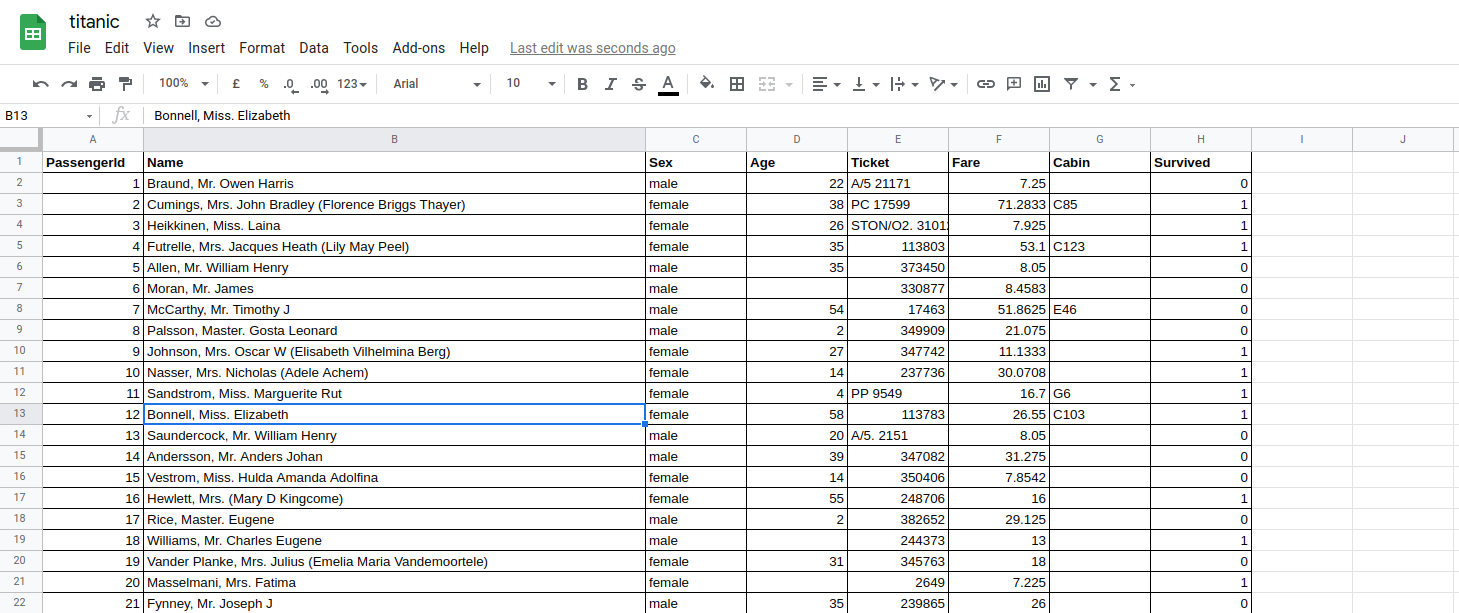

The same spreadsheet can be opened by pandas and viewed as so-called ``DataFrame``. 
We have attached this spreadsheet to this notebook; it is contained in the ``titanic.xlsx`` file.

To import it as pandas Data Frame we use:

In [6]:
df_titanic = pd.read_excel("titanic.xlsx")

Let us explain the meaning of each column of this spreadsheet

#### First let me explain the meaning of each column:

- __PassengerId__, an id was assigned to every passenger, 
- __Name__ contains the full name of the passenger, 
- __Sex__ is a gender of a passenger. 
- __Age__ contains the age of the passenger during the cruise. 
- __Ticket__ contains ticket number
- __Fare__ contains passenger fare.
- __Cabin__ contains the cabin number for each passenger. 
- __Survived__ contains information if the passenger survived the sinking of titanic (0 = No; 1 = Yes)

To display the header of this file we use:

In [ ]:
df_titanic.head()

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0


You can also display the tail of this spreadsheet

In [ ]:
df_titanic.tail()

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
886,887,"Montvila, Rev. Juozas",male,27.0,211536,13.00,NaN,0
887,888,"Graham, Miss. Margaret Edith",female,19.0,112053,30.00,B42,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.45,NaN,0
889,890,"Behr, Mr. Karl Howell",male,26.0,111369,30.00,C148,1
890,891,"Dooley, Mr. Patrick",male,32.0,370376,7.75,NaN,0


Both head and tail function take an integer input, inputting an integer $n$ allows us to display $n$ entries

In [ ]:
n = 8
df_titanic.head(n)

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0
5,6,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,0
6,7,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,0
7,8,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,NaN,0


In [ ]:
df_titanic.tail(n)

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
883,884,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.500,NaN,0
884,885,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.050,NaN,0
885,886,"Rice, Mrs. William (Margaret Norton)",female,39.0,382652,29.125,NaN,0
886,887,"Montvila, Rev. Juozas",male,27.0,211536,13.000,NaN,0
887,888,"Graham, Miss. Margaret Edith",female,19.0,112053,30.000,B42,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.450,NaN,0
889,890,"Behr, Mr. Karl Howell",male,26.0,111369,30.000,C148,1
890,891,"Dooley, Mr. Patrick",male,32.0,370376,7.750,NaN,0


### Exercise 0.1

Import the file ``avocado.xlsx`` as ``pandas`` Data Frame. 

Display its header and its tail:

Display first 20 rows of the header:

### Creating Dataframe from lists

How about creating a Data Frame that holds the same information, but it is much more flexible than a dictionary in terms of functionality. 

In [ ]:
df_gradebook = pd.DataFrame()

df_gradebook["Student id"] = ["UP123", "UP124", "UP125", "UP126"]
df_gradebook["Marks (out of 10)"] = ["10", "5", "7", "6"]

In [ ]:
df_gradebook

,Student id,Marks (out of 10)
0,UP123,10
1,UP124,5
2,UP125,7
3,UP126,6


Even though we have used lists to construct the DataFrame columns they are flexible to use (as they were converted to pandas Series)

In [ ]:
type(df_gradebook["Student id"])

pandas.core.series.Series

To print a single column of the data frame we use:

In [ ]:
print(df_gradebook["Marks (out of 10)"])

0    10
1     5
2     7
3     6
Name: Marks (out of 10), dtype: object


### Exercise 1.1

Create a simple Data Frame that represents the following spreadsheet:

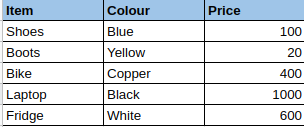

Print each of the columns of this Data Frame. 

## 2 Viewing data

Let's come back to our ``titanic`` example. We can access the index of the DataFrame as follows:

In [ ]:
df_titanic.index

RangeIndex(start=0, stop=891, step=1)

By default it is a pandas RangeIndex type, it works similarly to ``range`` it starts at 0, the last entry is stop - 1, the step is 1. 

We may use different type of indexing, but for now we are going to use the default one. 

How about displaying all the column names of our Data Frame?
We do it as follows:

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Survived'],
      dtype='object')

This type can be treated as a list or numpy array, we can call its elements via an index. 

In [ ]:
df_titanic.columns[0], df_titanic.columns[-1]

('PassengerId', 'Survived')

We already know how to view values of a particular column, e.g. 

``df_titanic["Survived"]``

If the name of the column does not contain spaces we can also view the values by

In [ ]:
df_titanic["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
df_titanic.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

If we wish to get numpy array from the pd.Series we use ``your_pd_series.values``:

In [ ]:
df_titanic.Survived.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

We can also get a quick statistic summary of our data. This is done via:

In [ ]:
df_titanic.describe()

,PassengerId,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,32.204208,0.383838
std,257.353842,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,20.125000,7.910400,0.000000
50%,446.000000,28.000000,14.454200,0.000000
75%,668.500000,38.000000,31.000000,1.000000
max,891.000000,80.000000,512.329200,1.000000


Note that for pandas ``displaying`` produces nicer outputs than ``printing``

In [ ]:
print(df_titanic.describe())

       PassengerId         Age        Fare    Survived
count   891.000000  714.000000  891.000000  891.000000
mean    446.000000   29.699118   32.204208    0.383838
std     257.353842   14.526497   49.693429    0.486592
min       1.000000    0.420000    0.000000    0.000000
25%     223.500000   20.125000    7.910400    0.000000
50%     446.000000   28.000000   14.454200    0.000000
75%     668.500000   38.000000   31.000000    1.000000
max     891.000000   80.000000  512.329200    1.000000


Displaying can be also achieved through display command as follows:

In [ ]:
display(df_titanic.describe())

,PassengerId,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,32.204208,0.383838
std,257.353842,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,223.500000,20.125000,7.910400,0.000000
50%,446.000000,28.000000,14.454200,0.000000
75%,668.500000,38.000000,31.000000,1.000000
max,891.000000,80.000000,512.329200,1.000000


Note that the above stats are only for the numerical columns. 

### Exercise 2.1

With the avocado data frame from Exercise 0.1:

Please display its columns.

Display the stats of this data frame:

Display all the entries of this data frame in the column ``Total Bags``.

Convert your data frame to a numpy array and then print it. 

### Transposing your data

You have probably heard about transposing operation. In matrices, a transpose swaps the rows with columns. This operation make sense with Data Frames as well. 

In [2]:
df_titanic_t = df_titanic.T
df_titanic_t 

With this particular example it is not the best thing to do. However, we got an interesting data frame. Let's spend some time on it. 

### Exercise 2.2

Display the index of the above transposed titanic DataFrame. 

Note that it starts with an index but its elements can be accessed as lists. 

## 3 Selection - Selecting particular elements of a Data Frame

Let us display the titanic data frame again:

In [ ]:
df_titanic.head()

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0


So far we have learnt how to display a particular column of a data frame.

In [ ]:
df_titanic["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

How to select only entries that satisfy a particular condition.
This is very similar to boolean indexing in numpy:

In [ ]:
df_titanic[df_titanic["Age"] > 40]

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
6,7,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,0
11,12,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,C103,1
15,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,248706,16.0000,NaN,1
33,34,"Wheadon, Mr. Edward H",male,66.0,C.A. 24579,10.5000,NaN,0
35,36,"Holverson, Mr. Alexander Oskar",male,42.0,113789,52.0000,NaN,0
...,...,...,...,...,...,...,...,...
862,863,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,17466,25.9292,D17,1
865,866,"Bystrom, Mrs. (Karolina)",female,42.0,236852,13.0000,NaN,1
871,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,11751,52.5542,D35,1
873,874,"Vander Cruyssen, Mr. Victor",male,47.0,345765,9.0000,NaN,0


Note that the above has displayed a new data frame so that it contains only the elements that have ``Age`` value $> 40$.

Let us save it in a new variable:

In [ ]:
df_titanic_forty_plus = df_titanic[df_titanic["Age"] > 40]
df_titanic_forty_plus

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
6,7,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,0
11,12,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,C103,1
15,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,248706,16.0000,NaN,1
33,34,"Wheadon, Mr. Edward H",male,66.0,C.A. 24579,10.5000,NaN,0
35,36,"Holverson, Mr. Alexander Oskar",male,42.0,113789,52.0000,NaN,0
...,...,...,...,...,...,...,...,...
862,863,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,17466,25.9292,D17,1
865,866,"Bystrom, Mrs. (Karolina)",female,42.0,236852,13.0000,NaN,1
871,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,11751,52.5542,D35,1
873,874,"Vander Cruyssen, Mr. Victor",male,47.0,345765,9.0000,NaN,0


The index seems to be a bit odd, it links to the old ``df_titanic`` Data Frame, but what if we wanted this to start from $0$. 

In [ ]:
df_titanic_forty_plus.reset_index()

,index,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
0,6,7,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,0
1,11,12,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,C103,1
2,15,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,248706,16.0000,NaN,1
3,33,34,"Wheadon, Mr. Edward H",male,66.0,C.A. 24579,10.5000,NaN,0
4,35,36,"Holverson, Mr. Alexander Oskar",male,42.0,113789,52.0000,NaN,0
...,...,...,...,...,...,...,...,...,...
145,862,863,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,17466,25.9292,D17,1
146,865,866,"Bystrom, Mrs. (Karolina)",female,42.0,236852,13.0000,NaN,1
147,871,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,11751,52.5542,D35,1
148,873,874,"Vander Cruyssen, Mr. Victor",male,47.0,345765,9.0000,NaN,0


The above has created a new data frame, and it saved the old index for you. What if we wanted to get rid of this index?

In [ ]:
df_titanic_forty_plus.reset_index(drop=True)

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
0,7,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,0
1,12,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,C103,1
2,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,248706,16.0000,NaN,1
3,34,"Wheadon, Mr. Edward H",male,66.0,C.A. 24579,10.5000,NaN,0
4,36,"Holverson, Mr. Alexander Oskar",male,42.0,113789,52.0000,NaN,0
...,...,...,...,...,...,...,...,...
145,863,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,17466,25.9292,D17,1
146,866,"Bystrom, Mrs. (Karolina)",female,42.0,236852,13.0000,NaN,1
147,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,11751,52.5542,D35,1
148,874,"Vander Cruyssen, Mr. Victor",male,47.0,345765,9.0000,NaN,0


### Exercise 3.1

In the cell below filter the titanic data frame so that it only contains the people who survived sinking the titanic. Save it in a variable ``df_titanic_survived`` and display it. 

Then reset its index and drop the old index. Then again overwrite ``df_titanic_survived`` with this result and display it again. 

### Selection by label

What if we wanted to display only particular columns of a data frame. We know how to display one column, but we want more. 

In [ ]:
df_titanic[["PassengerId", "Name", "Sex"]]

,PassengerId,Name,Sex
0,1,"Braund, Mr. Owen Harris",male
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,"Allen, Mr. William Henry",male
...,...,...,...
886,887,"Montvila, Rev. Juozas",male
887,888,"Graham, Miss. Margaret Edith",female
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,890,"Behr, Mr. Karl Howell",male


We can also use the location to get fewer rows (we have to make sure to use proper index values).

In [ ]:
df_titanic.loc[5:10, ["PassengerId", "Name", "Sex"]]

,PassengerId,Name,Sex
5,6,"Moran, Mr. James",male
6,7,"McCarthy, Mr. Timothy J",male
7,8,"Palsson, Master. Gosta Leonard",male
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,11,"Sandstrom, Miss. Marguerite Rut",female


### Exercise 3.2

In the cell below create a data frame from ``df_titanic`` so that it contains only the columns "Name", "Age" and "Survived" and it contains only 100 first rows. 

Then filter it so that it only contains people whose age is less than 18. 

### Selection by position

We can also select particular rows and columns by a numerical index. For that we use ``iloc`` rather than ``loc``. 

In [ ]:
df_titanic.iloc[:10, 2:4]

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


Note that we displayed first 10 rows and the columns that have index 2 and 3. 

In [ ]:
df_titanic.columns[2], df_titanic.columns[3]

('Sex', 'Age')

### Exercise 3.3

In the cell below create a data frame from ``df_titanic`` so that it only contains the rows between 10th and 30th, and columns from 4th to 6th.

In [ ]:
df_titanic.iloc[10:31, 4:7]

,Ticket,Fare,Cabin
10,PP 9549,16.7000,G6
11,113783,26.5500,C103
12,A/5. 2151,8.0500,NaN
13,347082,31.2750,NaN
14,350406,7.8542,NaN
15,248706,16.0000,NaN
16,382652,29.1250,NaN
17,244373,13.0000,NaN
18,345763,18.0000,NaN
19,2649,7.2250,NaN


#### Important note that ``iloc`` works as follows

``DataFrame.iloc[ start:end:step, start:end:step]``

The first entry represents rows the second entry represents columns. 

We can also display single elements:

In [ ]:
df_titanic.iloc[30, 7]

0

## 4 More operations on DataFrame's rows/columns/entries

We have already seen how to display stats of a data frame.
How about individual stats?

In [ ]:
df_titanic.mean()

PassengerId    446.000000
Age             29.699118
Fare            32.204208
Survived         0.383838
dtype: float64

The above displayed the average of every column.
How about the average of every numerical row? Remember the axis argument in numpy? You can use it here. 

In [ ]:
df_titanic.mean(axis=1)

0        7.562500
1       28.070825
2        9.481250
3       23.275000
4       12.012500
          ...    
886    231.750000
887    234.500000
888    304.150000
889    236.750000
890    232.687500
Length: 891, dtype: float64

We can also use the other functions such as ``sum``, ``std``, ``median``, ``max``, ``min``. 

In [ ]:
df_titanic.sum()

PassengerId                                               397386
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
Fare                                                     28693.9
Survived                                                     342
dtype: object

Note that sum is  a bit silly and it also contatenates the strings. 

In [ ]:
df_titanic.std()

PassengerId    257.353842
Age             14.526497
Fare            49.693429
Survived         0.486592
dtype: float64

In [ ]:
df_titanic.median()

PassengerId    446.0000
Age             28.0000
Fare            14.4542
Survived         0.0000
dtype: float64

In [ ]:
df_titanic.max()

PassengerId                            891
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
Fare                               512.329
Survived                                 1
dtype: object

In [ ]:
df_titanic.min()

PassengerId                      1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
Fare                             0
Survived                         0
dtype: object

### Exercise 4.1

From the ``df_titanic`` data frame find the total number of passengers who survived the sinking. 

From the ``df_titanic`` data frame find the average price of the fare. 



#### Correlation. To find how are the columns related to each other, for that we display the correlation matrix.
The correlation is a coefficient between $-1$ and $1$:
- $0$ correlation, or very low absolute value of correlation means that both columns are almost not related at all. 
- $1$ correlation, or very high value of correlation means that they are related and their behaviours are alike. 
- $-1$ correlation, or very low value of correlation means that they are related and their behaviour are opposite.

In [ ]:
df_titanic.corr()

,PassengerId,Age,Fare,Survived
PassengerId,1.000000,0.036847,0.012658,-0.005007
Age,0.036847,1.000000,0.096067,-0.077221
Fare,0.012658,0.096067,1.000000,0.257307
Survived,-0.005007,-0.077221,0.257307,1.000000


#### String operations on columns

In [ ]:
df_titanic[["Name"]]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


If we wish to split a values of data frame columns with respect to some separator (e.g. comma, fullstop, space). We can do it as follows:

In [7]:
surnames = df_titanic.Name.str.split(",")
surnames

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

To extract the surname we access te first element of the list:

In [8]:
surnames = surnames.str[0]
surnames

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

### Exercise 4.5

We wish to check all unique surnames from the pd.Series ``surnames``.

First check the size of ``surnames`` check its size similarly as you would do that in the numpy array, using ``surnames.size``. 

To get only the unique surnames use ``your_pd_series.unique()`` and then print its size. 

Why do you think the number reduced? 

We can also replace symbols inside the column that contains strings:

### Exercise 4.6

In the ``df_titanic.Name column`` replace all the dots and commas with `|`.
Then display your result 

We can also check use ``str`` for selection:

In [ ]:
df_titanic[df_titanic.Name.str.contains("Mrs.")]

,PassengerId,Name,Sex,Age,Ticket,Fare,Cabin,Survived
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,1
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,NaN,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,NaN,1
15,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,248706,16.0000,NaN,1
...,...,...,...,...,...,...,...,...
871,872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,11751,52.5542,D35,1
874,875,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,P/PP 3381,24.0000,NaN,1
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,11767,83.1583,C50,1
880,881,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,230433,26.0000,NaN,1


### Exercise 4.7

You need to find out if there is a doctor (Dr. ) on the board. Find the list of all doctors (hopefully these are medial doctors not acadmic ones). 
From the list of all doctors display their name and the Cabin. 

## 5 Grouping

We may want to split the data into groups bases on some criteria or apply a function to each group independently. 

Let's demonstrate this on a example:

In [ ]:
df_titanic.groupby("Sex").sum()

,PassengerId,Age,Fare,Survived
Sex,,,,
female,135343,7286.00,13966.6628,233
male,262043,13919.17,14727.2865,109


This created a new data frame, so that sex of a passenger is its index. 
This is very informative, in particular, in finding up how many people of selected gender have survived. 

### Exercise 5.1

Use grouping by sex to find out the average age and average fare for each gender. 

### Exercise 5.2

Using grouping by to split the data into the ones who survived and did not survive the titanic sinking. Find the average Age and Fare for this particular grouping. 

## 6 Visualisation of DataFrames

Pandas Data Frames are equipped with plotting functions from the ``matplotlib`` library. Let us demonstrate a few examples:

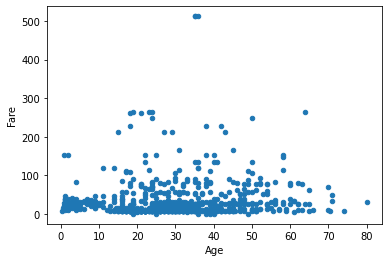

In [ ]:
df_titanic.plot(kind="scatter", x="Age", y="Fare")

Note that it works ever though we have not imported matplotlib. 
However, let us demonstrate how to eliminate the ``<matplotlib.axes...>`` text without ``plt.show()`` and without importing ``matplotlib.pyplot``.

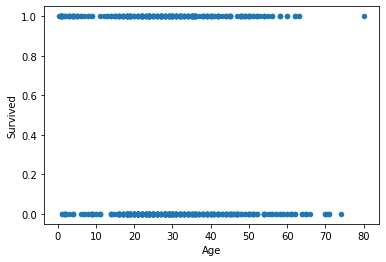

In [ ]:
df_titanic.plot(kind="scatter", x="Age", y="Survived");

The semi-colon ``;`` does the job.

How about the line plots:

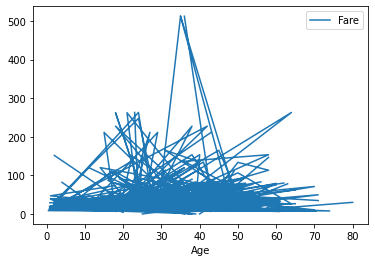

In [ ]:
df_titanic.plot(kind="line", x="Age", y="Fare");

This looks very messy, it would require some sorting of the Age column

In [ ]:
df_titanic_sorted_age = df_titanic.sort_values(by=["Age"])

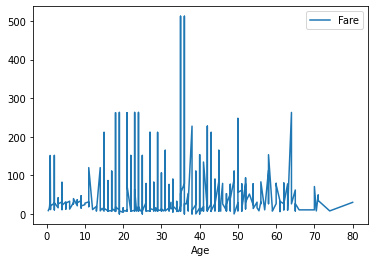

In [ ]:
df_titanic_sorted_age.plot(kind="line", x="Age", y="Fare");

This looks a bit better, but really we should take the mean fare for each age. 

In [ ]:
df_titanic_age_group = df_titanic.groupby("Age", as_index=False).mean()
df_titanic_age_group.head()

,Age,PassengerId,Fare,Survived
0,0.42,804.0,8.5167,1.0
1,0.67,756.0,14.5000,1.0
2,0.75,557.5,19.2583,1.0
3,0.83,455.5,23.8750,1.0
4,0.92,306.0,151.5500,1.0


Note that ``as_index=False`` did not make `Age` an index of the above DataFrame. 

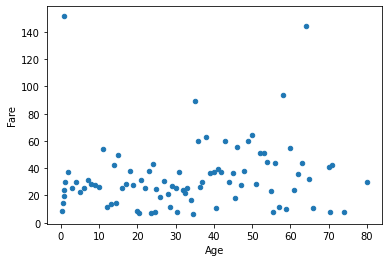

In [ ]:
df_titanic_age_group.plot(kind="scatter", x="Age", y="Fare");

### Exercise 6.1

Group your ``df_titanic`` by ``Age`` and get the mean. 
Then plot a scatter plot that demonstrates the relation between Age and Survived. Can you make any conclusions from the plot? 


### Exercise 6.2
Group your ``df_titanic`` by Fare and get the mean. Then plot a scatter plot that demonstrated the relation between Fare and Survived. Can you make any conslusions from the plot?

### Exercise 6.3
Group your ``df_titanic`` by Sex and get the mean. Then plot a scatter plot that demonstrated the relation between Sex and Survived. Can you make any conslusions from the plot? Yes, the plot should contain only two points. 

### How about histograms? 

Histograms of a single column can be obtained via:

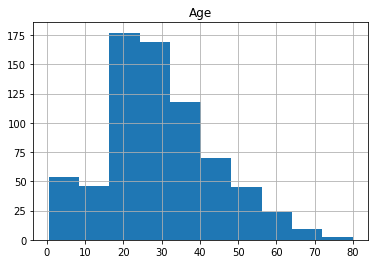

In [ ]:
df_titanic_sorted_age.hist(column="Age");

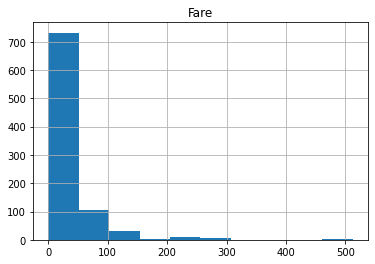

In [ ]:
df_titanic_sorted_age.hist(column="Fare", bins=10);

If we wish to seperate the histograms by groups, e.g., by Survived, to have two histograms for the ones who survived, and the ones who did not, we use: 

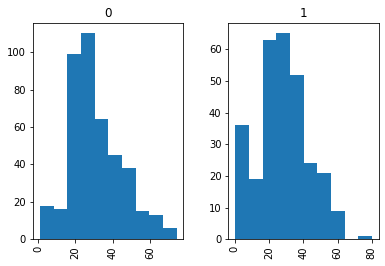

In [ ]:
df_titanic_sorted_age.hist(column="Age", by="Survived");

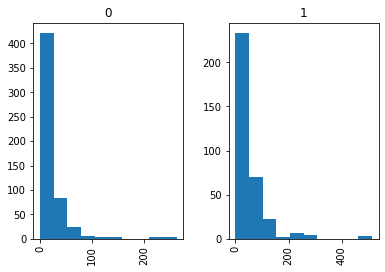

In [ ]:
df_titanic_sorted_age.hist(column="Fare", by="Survived");

### Exercise 6.4

Plot the histograms of 

a) Survived 

b) Fare

they should be separeted into groups by Sex. 

### 6.1 Plotting time series. 

You may want to visualise how some quantity was changing its value in time. For example this could be the price of some stock, or the accumulated number of Covid-19 infections. For that we can use pandas Series (recall that the columns of Pandas Data Frames are Series).

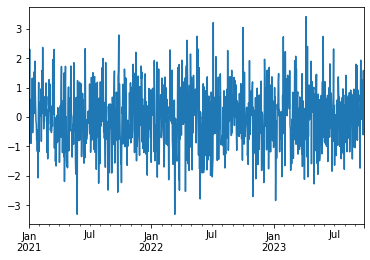

In [ ]:
num_of_random = 1000
random_values = np.random.normal(size=num_of_random) # a sample of 1000 from standard normal distribution
date_range = pd.date_range("1/1/2021", periods = num_of_random) # 1000 days starting from Jan 2021
time_series = pd.Series(random_values, index = date_range) # Creating a pd.Series
time_series.plot();

This looks very noisy, cannot get any information out of it. 
We need to look at this through the cumulative sums, then we will be able to see how the value has been changing from one to the other. This will look much more informative, but still a bit noisy. 

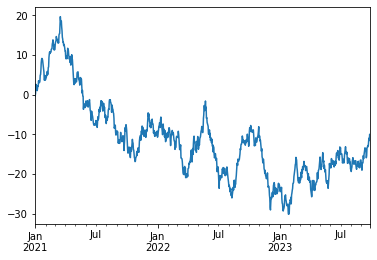

In [ ]:
time_series = time_series.cumsum()
time_series.plot();

Let us spend some time on ``cumsum()``. 
Let us take a simply Series:



In [ ]:
mySeries = pd.Series([1, 2, 3, 4, 5])
print(mySeries.cumsum())

0     1
1     3
2     6
3    10
4    15
dtype: int64


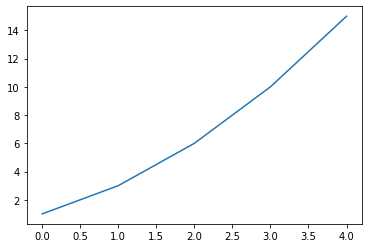

In [ ]:
mySeries.cumsum().plot();

Given the numerical data 
$$ [x_1, x_2, x_3, \ldots, x_n]$$
The cumulative sum is 
$$ [x_1, x_1 + x_2, x_1 + x_2 + x_3, \ldots, x_1 + x_2 + x_3 + \cdots + x_n]$$

### Exercise 6.1.1

Import ``C19_portsmouth.xlsx`` into a pandas Data Frame. This is a spreadsheet that shows the number of new Covid-19 cases that were published by date. 
Display the header of this spreadsheet.


Sort it by data from the oldest to newest, and assign this sorted data frame to a new variable. 

Use ``sort_values()`` function applied to a data frame. 

Add a new column to the sorted covid cases data frame which represents the cumulative sum of new cases. 

Plot the line plot of cumulative cases so that the x-axis is the date. 
Note that the function is increasing (as you add positive values to each other. If the infection slows down the function will have less steep slope, if we get more and more infection the slope will be very steep. 

In the cell below plot the line plot of the ``newCasesByPublishDate`` so that the $x$-axis is the date. This plot will look noisy, but you will be able to see particular days with spikes of infections. 

## 7 Importing and Exporting files/spreadsheets.

So far we have learnt how to import files such as Excel files. 
However, often the data will be available to you in a .csv format, this is a spreadsheet without fancy Excel formatting. 

In this section we will learn how to import csv. 

We will also learn how to export our data frames to csv and xlsx files. 

Let us import csv from ``sample_data`` folder

In [ ]:
df_california_housing = pd.read_csv("sample_data/california_housing_train.csv")
df_california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


let us add a column bedroom per person

In [ ]:
df_california_housing["bedroom per person"] = df_california_housing["total_bedrooms"] / df_california_housing["population"]

In [ ]:
df_california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom per person
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.264039
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1.683791
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.522523
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.654369
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.522436


Let us now export this dataframe to a csv and xls spreadsheets

In [ ]:
df_california_housing.to_csv("california_housing_new.csv", index=False)

In [ ]:
df_california_housing.to_excel("california_housing_new.xlsx", index=False)

### Exercise 7.1

Import mnist_test.csv from sample data as a data frame. Call the dataframe ``df_mnist``. We will need to import it without the header. To achieve this set ``header`` parameter to ``None`` inside ``read_csv`` function. After that display the data frame. 

Each row consists of the label of the handwritten digit, e.g., first row represents 7, and 784 pixels, value 255 represents white and 0 represents black. 
Originally these were 28 x 28 pixels images representing handwritten digits. 
We will reshape and plot one row.

In [ ]:
import matplotlib.pyplot as plt

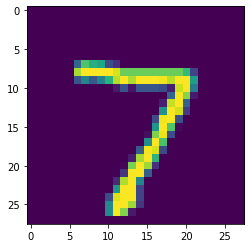

In [ ]:
seven = df_mnist.iloc[0,1:].values.reshape(28, 28)
plt.imshow(seven);

Your task is to plot ten first row as digit images. Please use the for loop. Don't forget to use ``plt.show()`` after ``plt.imshow``, otherwise you will see only one picture. 

### Exercise 7.2

Now modify ``df_mnist`` so that the pixels are normalised, have values between 0 and 1.

 You can achieve this by dividing the right part of the dataframe by 255. 
 
 You may want to first select all the rows and all columns except the first column then divide by 255. 
 
 Then you can add the first column back to the dataset. After that export your new data frame to csv and to xlsx. (Exporting will take a while about 3 mins)

## 8 Summary Exercises


### Exercise 8.1

We will be processing titanic.xlsx spreadsheet. Your task is to extract title (e.g. Miss, Mr etc.) from the ``Name`` column and saved its value in the new column title. 

After you succeed plot the histogram of Survived by the groups in Title. 
You should conclude what titles were more likely to survive and which ones were more likely to die. 

Hint use: ``your_data_frame["Your Column"].str.split(' ')``

To make your histograms readable add the parameter ``figsize=(10, 10)`` to your plotting function. 

### Exercise 8.2

This exercise is also about the tititanic data. 

When we plotted the correlation matrix, we noticed that the displayed columns were only numerical. To convert a column whose values are categorical (e.g. in this dataset the Sex column has two categories male and female). 

We can use 
``pd.factorize(your_data_frame_object)``
this will put the integers values to represent each category. If there are two categories we would get 0 and 1. 

You task is to create a new column that represents Sex numerically via using ``pd.factorize``. 

Then display the correlation matrix of your new data frame. Which column has the highest correlation with the column Survived (apart from Survived itself). 

### Exercise 8.3



You are an advisor of a restaurant that is famous from making Poached eggs with smashed avocado. The restaurant plans to open a new branch, but it cannot decide on the region (it considers all available regions from avocado.xlsx). 
You are asked to make some suggestions. You thought that it may be best to open a restaurant where on average the avocado prices are the lowest. 

From the avocado.xlsx find out which region has on average the cheapest (lowest AveragePrice) avocado. 

Hint: Use groupby

### External Pandas Tutorials

1. https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
2. https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
